# 🚀 Project 4: Titanic Survival Prediction using Logistic Regression

## 🧠 Objective
In this project, we build a **logistic regression classification model** to predict whether a passenger survived the Titanic disaster, based on features like age, gender, passenger class, and more.

This project is part of my **Coding Samurai Data Science Internship** and focuses on implementing a basic classification model using the Titanic dataset.

## 🗂️ Dataset Information
- **Source**: [Kaggle Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data)
- **Files Used**: `train.csv`
- **Target Variable**: `Survived` (0 = Did not survive, 1 = Survived)
- **Features**:
  - `Pclass` (Passenger class)
  - `Sex`
  - `Age`
  - `SibSp` (Number of siblings/spouses aboard)
  - `Parch` (Number of parents/children aboard)
  - `Fare`
  - `Embarked`

Let's dive into the code and start with loading the dataset!

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic training dataset
df = pd.read_csv("train.csv")

# Preview the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Section 2: Data Overview & Missing Value Analysis

Before modeling, it's important to understand the structure and quality of our data. In this section, we’ll:
- Examine column names, data types, and non-null values
- Generate summary statistics for numerical features
- Identify missing values across the dataset

In [13]:
# Get basic info about dataset structure
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 📊 Section 3: Exploratory Data Analysis (EDA)

This section visualizes survival distribution across key features to help us identify which variables may impact the likelihood of survival. We'll use Seaborn and Matplotlib to explore:
- Survival distribution overall
- Survival by gender
- Survival by passenger class

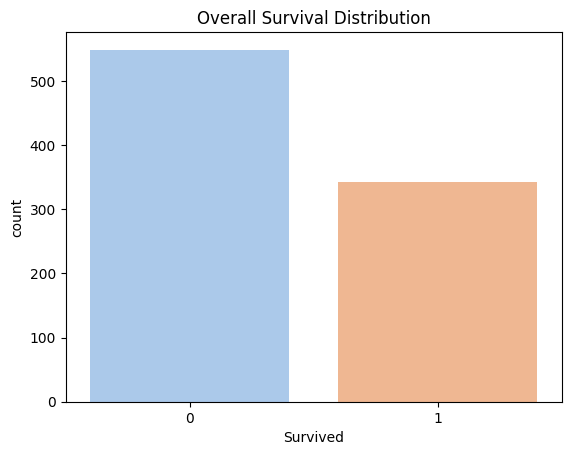

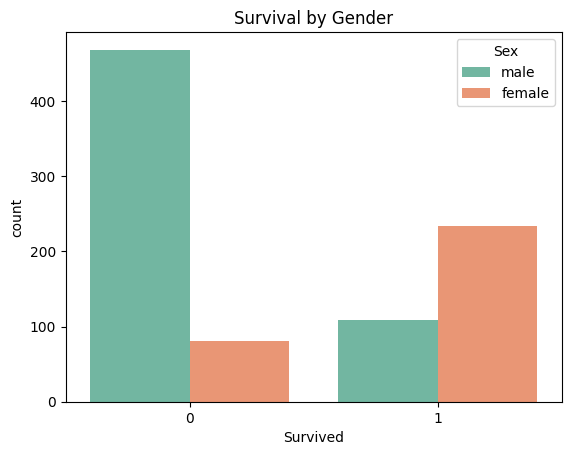

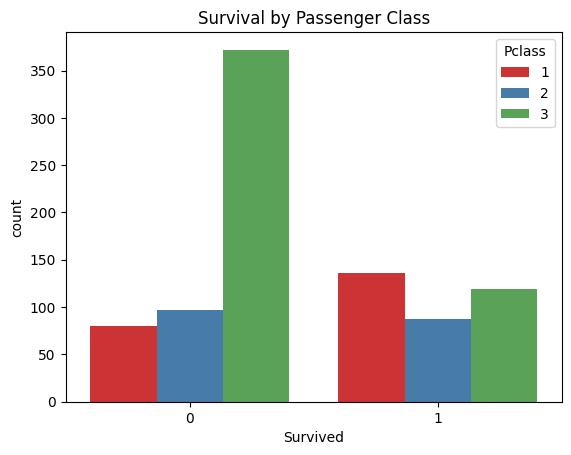

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Overall Survival Distribution"
plot_title2 = "Survival by Gender"
plot_title3 = "Survival by Passenger Class"


filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"
filename3 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title3.lower()) + ".png"


# Survival distribution
sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title(plot_title2)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

# Survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1')
plt.title(plot_title3)
plt.savefig(f"images/{filename3}", dpi=300, bbox_inches='tight')
plt.show()

## 📈 Age and Fare Distributions

Visualizing the distribution of continuous features like `Age` and `Fare` helps us understand the data better. This can uncover skewness, outliers, and natural groupings that may affect model performance.

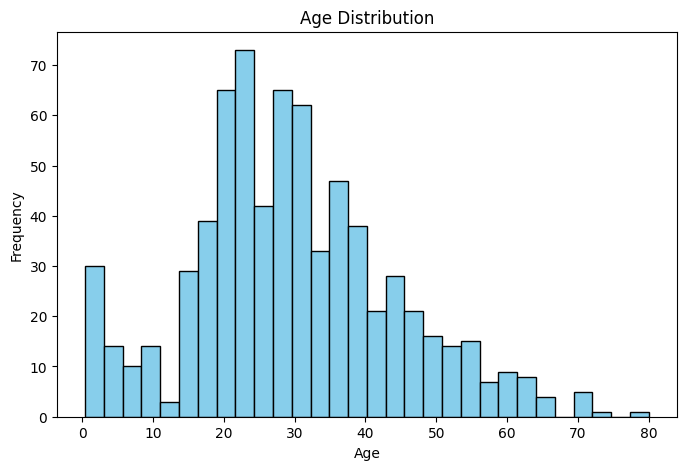

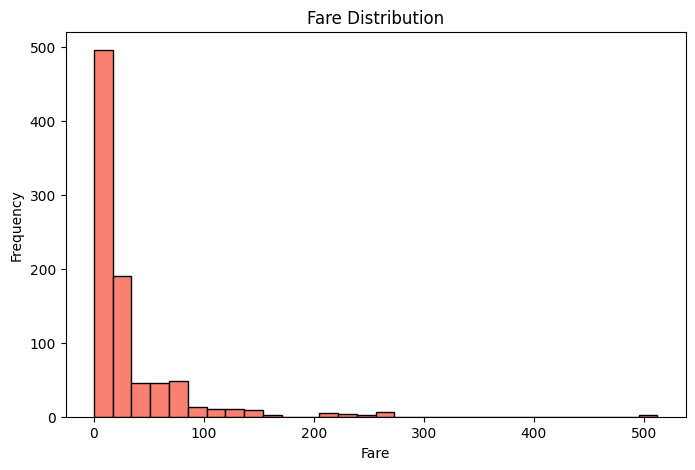

In [15]:
os.makedirs("images", exist_ok=True)
plot_title = "Age Distribution"
plot_title2 = "Fare Distribution"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"

# Age Distribution
plt.figure(figsize=(8, 5))
df['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title(plot_title)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
df['Fare'].hist(bins=30, color='salmon', edgecolor='black')
plt.title(plot_title2)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.grid(False)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()

## 🧼 Data Cleaning - Handling Missing Values

The dataset has missing values in the `Age`, `Cabin`, and `Embarked` columns. Here's how we'll handle them:

- **Drop `Cabin`** since it's mostly missing and not that informative.
- **Fill missing `Age`** with the median age.
- **Fill missing `Embarked`** with the most frequent value (mode).

In [16]:
# Drop Cabin since it's mostly missing
df.drop(columns='Cabin', inplace=True)

# Replace missing Age with median — the safe way
df['Age'] = df['Age'].fillna(df['Age'].median())

# Replace missing Embarked with mode — the safe way
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Final check for missing values
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 📘 Encoding Categorical Variables

To feed our data into a machine learning model, we need to convert categorical variables like `Sex` and `Embarked` into numerical values. This step is essential for most scikit-learn models, including logistic regression.

We’ll:
- Map `Sex` to 0 and 1.
- Use `get_dummies()` for `Embarked` and drop one to avoid multicollinearity.

In [17]:
# Encode 'Sex' column: male -> 0, female -> 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop the first to avoid dummy variable trap
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Let's check the updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


### 🧹 Dropping Irrelevant Columns

Certain columns like `PassengerId`, `Name`, and `Ticket` don’t provide meaningful value to our predictive model. They may introduce noise or unnecessary complexity.

We’ll drop:
- `PassengerId` — just an identifier, no predictive power.
- `Name` — while titles could be useful, we won't extract them in this basic model.
- `Ticket` — too unstructured and inconsistent for simple models.

In [18]:
# Dropping irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

### 📚 Train-Test Split

Now that the dataset is cleaned and preprocessed, we’ll split it into **features (X)** and **target (y)**.

Then, we’ll split the data into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

This helps us evaluate the model on unseen data and avoid overfitting.

In [19]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Model Training - Logistic Regression

Now we’ll build a **Logistic Regression** model using `Scikit-learn`. Logistic Regression is a powerful yet interpretable algorithm for binary classification tasks like predicting survival (Yes/No).

We'll use `LogisticRegression` from `sklearn.linear_model`, train it on the training data, and make predictions on the test set.

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## 📊 Model Evaluation

After training the logistic regression model, we evaluate its performance using:

- **Accuracy Score**: Overall correctness of the model.
- **Confusion Matrix**: Breaks down predictions into true/false positives/negatives.
- **Classification Report**: Gives precision, recall, and F1-score for each class.

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.81
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## 🔍 Confusion Matrix Visualization

To better understand model performance, we visualize the confusion matrix. This highlights where the model predicts well and where it may be misclassifying.

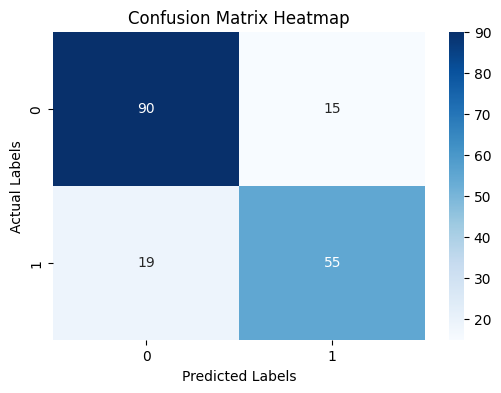

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)
plot_title = "Confusion Matrix Heatmap"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()